<a href="https://colab.research.google.com/github/kim-ashmore/Simple-Todo/blob/master/digit_classification_with_mnist_template_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recognizing Handwritten Digits using Deep Learning

This notebook is one of many deep learning jupyter notebooks that are designed to get you started with machine learning. Specifically, this notebook will walk you through the end-to-end learning of a simple Convolutional Neural Network on the popular MNIST dataset. The code in this notebook has been adapted from Keras Tutorials by Francois Chollet (https://github.com/fchollet/keras-resources) and, of course, StackOverflow discussions, Medium articles and blogs.

**Task**: Given an image of a handwritten digit, predict what digit is in the image

**Features**: Images of handwritten digits (pixel values)

**Target**: Digit in the image


# 0. Import modules and libraries

The following code block imports all the packages that are needed to successfully run this notebook. Note that, Google Colaboratory (Colab) provides support for Python 2.7 and 3.6 along with GPU acceleration. Within the Google Colaboratory environment, machine learning and deep learning toolkits are pre-installed on their cloud infrastructure. Specifically, packages such as Tensorflow, Scikit-Learn, Matplotlib are readily available with no additional configurations and hence, can be directly imported. You can read more about the features and benefits of using Colab here - https://colab.research.google.com/notebooks/welcome.ipynb

However, for packages that are not pre-installed, you may have to install them manually by following the steps outlined here - https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb 

In [0]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


# 1. Load the data

Most machine learning toolkits/libraries provide few out-of-the-box toy datasets to get you started. The load_data( ) method, pre-defined in Keras, helps in this regard by loading any of such toy datasets. For other customized datasets, you can refer to the source code for load_data( ) and design your own helper function.

Reference: https://www.tensorflow.org/code/stable/tensorflow/python/keras/datasets/mnist.py

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. For Your Information!

## a. Data Statistics

This chunk of code gives information about the statistics of the train and test sets that was read in the last step.  The *shape* property returns the current shape of the array. More simply, *shape* gives the dimension information of the n-dimensional Numpy array.

Reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html

In [0]:
print("Number of images in training = " + str(x_train.shape[0]))
print("x_train Examples Loaded = " + str(x_train.shape))
print("y_train Examples Loaded = " + str(y_train.shape))

print("Number of images in test = " + str(x_test.shape[0]))
print("x_test Examples Loaded = " + str(x_test.shape))
print("y_test Examples Loaded = " + str(y_test.shape))

Number of images in training = 60000
x_train Examples Loaded = (60000, 28, 28)
y_train Examples Loaded = (60000,)
Number of images in test = 10000
x_test Examples Loaded = (10000, 28, 28)
y_test Examples Loaded = (10000,)


## b. Data Visualization

The following code snippet can be used to visualize a few images in the MNIST dataset using the ***matplotlib*** visualization module. The *subplot( )* method is used when we would want to plot more than two plots within the same figure. *imshow( )* draws the image of a given plot. Defining these subplots and drawing the image of these plots does not display them when the code is executed. In order to display these plots, we need to use *show( )*.

*   *show( )* displays the figure and should not be called unless you want to display the plots you have plotted. Whereas, *imshow( )* only draws an image on the figure. Hence, invoking *show( )* without drawing anything is meaningless.
*   When drawing an image on the figure, if there is no figure created previously, then *imshow( )* creates a figure before drawing. Alternatively, if you want to explictly create a new figure, you can also use *plt.figure( )* and then draw your images on this figure via *imshow( )*.

The image data that you want to plot and the colormap that should be used to display the image are the two basic parameters to the *imshow( )* method. For more parameters that are available, please refer to https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html

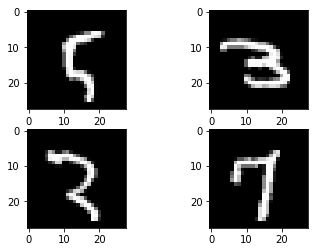

In [0]:
plt.subplot(221)
plt.imshow(x_train[100], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[250], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[500], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[750], cmap=plt.get_cmap('gray'))

plt.show()

# 3. Prepare image data

## a. Reshaping the data

Before we can use the MNIST data to train a Convolutional Neural Network, we need to reshape the images appropriately. Two-dimensional convolutional layers in Keras require pixel values with the dimensions as *[pixels][width][height]*. In case of RGB images, the pixel dimension would be 3 for the red, green and blue components. Since MNIST consists of images where the pixel values are gray scale, the pixel dimension will be set to 1.

The *image_data_format* parameter defines how the backend treats the data dimensions when working with multi-dimensional convolution layers. In other words, this parameter specifies the ordering of the dimensions in the input, specifically where the *channels* dimension is in the data. 

The possible values that the parameter can take are *channels_first* or *channels_last*. For two-dimensional images, *channels_last* assumes **(batch, height, width, channels)** while  *channels_first* assumes **(batch, channels, height, width)**.

More information about the Keras backend and the significance of *image_data_format* can be found here: 

1.https://keras.io/backend/

2.https://www.codesofinterest.com/2017/09/keras-image-data-format.html

**NOTE**: For Python < 3.5, *set_image_dim_ordering* would be the parameter to specify the data format convention. That is,
```
from keras import backend as K
K.set_image_dim_ordering('th')
```

In [0]:
# Use astype() to change the values to floating-point so that we can get 
# decimal points after division (see Section 3b. Normalizing the data)
from keras import backend as K
if K.image_data_format() == 'channels_last':
  x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
else:
  x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
  x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')

## b. Normalizing the data features

It is always a good idea to normalize the pixel values. We will normalize the RGB codes (0 through 255) by dividing them by the max RGB value. 

In [37]:
x_train = x_train/ 255
x_test = x_test/ 255
  
print(x_test[0:1])

[[[[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [

## c. Binarize data targets

The MNIST dataset consists of images as inputs and the corresponding digit, represented by the image, as targets. The labels range from 0 through 9. Since machines understand only zeroes and ones, we need to represent these labels accordingly before we training our network. To achieve this, we can use the technique of **one-hot encoding**, which converts the label vectors to binary matrices.

The *np_utils.to_categorical( )* method in **keras.utils** can be used to generate the one-hot encoding for the target arrays; both train and test sets.

In [38]:
#classes = 10 
#encode label 6 => [0 0 0 0 0 0 1 0 0 0]

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



# 4. Model Building

The remainder of the code contains the most important part of the learning process: model building, training and evaluation.

0.   Choose hyperparameters for your model
1.   Build the Convolutional Neural Network
2.   Define what optimizer to use
3.   Define the loss function
4.   What metrics will be used to evaluate the performance
5.   Train a model on the training data
6.   Validate the model on the validation data
7.   Test the learned model on the test data

## 0. Define model hyperparameters

A *model hyperparameter* refers to an external configuration of the model which are usually specified by the model programmer using heuristics. There does not exist a hard fas rule to find the best value for a hyperparameter. We rely on searching for this best value by trial and error approach via experiments. When you tune a machine learning algorithm (in other words, the resulting model), it means that we tune the hyperparameters of the model, with the objective of obtaining the most appropriate prediction outcomes.

The following (immediate) code defines what hyperparameters are chosen for this task and we initialize them with some values.

In [0]:
BATCH_SIZE = 200
EPOCHS = 10

## 1. Build the Convolutional Neural Network

Our simple Convolutional Neural Network (CNN) will consist of two ***convolutional*** layers, followed by a ***pooling*** layer. A ***dropout*** layer will be added after the pooling layer. Then we add a ***fully-connected*** layer with 128 hidden units (with *RELU* as the activation function). Finally, we add another ***fully-connected*** layer (output layer) with 10 hidden units and *softmax* as the activation function.

The code in the following cell implements the architecture CNN described above. 

In [40]:
''' YOUR CODE GOES HERE '''

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), input_shape=(28,28, 1), activation='relu'))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total para

## 2. Select the optimizer, loss function and metrics to evaluate the model

A machine learning model is all about optimizing the variables of the model, based on some constraints that results in an objective function. The objective function is typically minimizing some error measure or maximizing some utility function. More specifically, optimization is about how data can be effectively used, how to avoid local minima and search for a good solution. In order to achieve this, we make use of optimization. While there are many such optimization algorithms, we will be using **Adam's optimization function**.

A loss function is a simple method that evaluates how well an algorithm models the dataset. The loss function is what tells you if your algorithm is making any improvements than before. We will use **categorical_crossentropy** as the loss function, since our data has labels ranging from 0 through 9 (multi-label classification problem).

Metrics are used to determine how performance of various machine learning algorithms can be measured and compared. While there are numerous metrics that could be used, for this task, we will use **accuracy** as our performance metric.

The *compile( )* method is used to specify what optimizer should be used by our model, along with the loss function and the evaluation metric. See the documentation to know about other method parameters that you can use [here](https://keras.io/models/model/#compile)

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 3. Model Training

The *fit( )* method in Keras is used to train the model on a given data set (here, *x_train* and *y_train*). The method also takes a parameter *validation_data*, which allows us to specify the validation set on which the model should be evaluated. To know more about other parameters to the *fit( )* method, refer to Keras documentation [here](https://keras.io/models/model/#fit)

In [0]:
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10


## 4. Model Evaluation

Once we have agreed on the best model (on the validation data), the next step would be to test the model on new, unseen data. The *evaluate( )* method in Keras is used to apply the model on the test set and report the model performance on new, unseen data. Note that, this test set has not been used (and should NOT be!) used during model training. [Here](https://keras.io/models/model/#evaluate) is the documentation about the *evaluate( )* method, in case you would like to know more about the parameters that can be used in this method.

There also exists another method called *predict( )* in Keras, which is used to only generate the output predictions. The difference between *evaluate( )* and *predict( )* is that the former returns the loss value and metric while testing the model, but the latter does not. (see [here](https://keras.io/models/model/#predict))

In [0]:
scores = model.evaluate(x_test, y_test, verbose=0)


print('Test Loss:', scores[0])
print('Test Accuracy:', scores[1])